In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys 

sns.set_theme()

from datetime import datetime, timedelta
from src.models import SimulateStatement, Model
from src.modelstats import ModelStats
from src.prob import ProbabilityAnalysis
from src.plots import plot_volatilities, plot_prob_evolution
from dataclasses import dataclass
from src.crop import crop_statements_until_t_by_politician, crop_statements_until_t
from datetime import datetime
from tqdm import tqdm

In [3]:
from src.modelstats import ModelStats


data_path = "data/DATA_FINAL.csv"
data_deputados_path = "data/DEPUTADOS_FINAL.csv"

lambd = 0.1
delta = 0.01
lag = 10 # days

date_of_reckoning = datetime(2019,7,10)

probability_analysis = ProbabilityAnalysis(data_path, data_deputados_path)
probability_analysis = probability_analysis.get_timeframes(lag= lag, day_of_reckoning=date_of_reckoning)

ids = probability_analysis.get_politicians()
probability_analysis= probability_analysis.get_statement_volatility()
tau = probability_analysis.get_all_statements_per_politician(267)


In [4]:

high_volatility_ids = probability_analysis.get_high_statement_volatility_politicians()
from_id_to_name_high_vol, from_name_to_id_high_vol, high_volatility_politican_info = probability_analysis.get_high_statement_volatility_info()

In [5]:
high_volatility_politican_info

[     Unnamed: 0 Partido     Estado                    NOME  Id_politico
 477         477      SD  São Paulo  PAULO PEREIRA DA SILVA          477,
      Unnamed: 0 Partido     Estado            NOME  Id_politico
 470         470     PRB  São Paulo  MARCOS PEREIRA          470,
      Unnamed: 0 Partido        Estado         NOME  Id_politico
 195         195     PHS  Minas Gerais  MARCELO ARO          195,
     Unnamed: 0 Partido Estado            NOME  Id_politico
 74          74    PROS  Ceará  CAPITAO WAGNER           74,
      Unnamed: 0 Partido    Estado        NOME  Id_politico
 135         135     PDT  Maranhão  GIL CUTRIM          135,
     Unnamed: 0 Partido Estado       NOME  Id_politico
 48          48     PRB  Bahia  JOAO ROMA           48,
      Unnamed: 0 Partido      Estado               NOME  Id_politico
 286         286      PP  Pernambuco  FERNANDO MONTEIRO          286,
      Unnamed: 0 Partido  Estado          NOME  Id_politico
 267         267     PPS  Paraná  RUBEN

running models at different timecuts


In [ ]:

from_politician_to_prob_time_series = {}

for id_politican in tqdm(ids):
    from_time_cut_to_probability = probability_analysis.get_politician_probability_evolution(lambd, delta,  id_politico = id_politican )
    from_politician_to_prob_time_series[id_politican] = from_time_cut_to_probability

In [7]:
print(from_politician_to_prob_time_series)

{477: {Timestamp('2019-04-21 17:36:46'): {'A': 0.26666666666666666, 'O': 0.7333333333333333}, Timestamp('2019-05-01 17:36:46'): {'A': 0.26666666666666666, 'O': 0.7333333333333333}, Timestamp('2019-05-11 17:36:46'): {'A': 0.26666666666666666, 'O': 0.7333333333333333}, Timestamp('2019-05-21 17:36:46'): {'A': 0.26666666666666666, 'O': 0.7333333333333333}, Timestamp('2019-05-31 17:36:46'): {'A': 0.26666666666666666, 'O': 0.7333333333333333}, Timestamp('2019-06-10 17:36:46'): {'A': 0.26666666666666666, 'O': 0.7333333333333333}, Timestamp('2019-06-20 17:36:46'): {'A': 0.26666666666666666, 'O': 0.7333333333333333}, Timestamp('2019-06-30 17:36:46'): {'A': 0.5476190476190477, 'O': 0.4523809523809524}}, 470: {Timestamp('2019-04-21 17:36:46'): {'A': 0.6909090909090909, 'O': 0.3090909090909091}, Timestamp('2019-05-01 17:36:46'): {'A': 0.7166666666666667, 'O': 0.2833333333333333}, Timestamp('2019-05-11 17:36:46'): {'A': 0.7384615384615385, 'O': 0.26153846153846155}, Timestamp('2019-05-21 17:36:46')

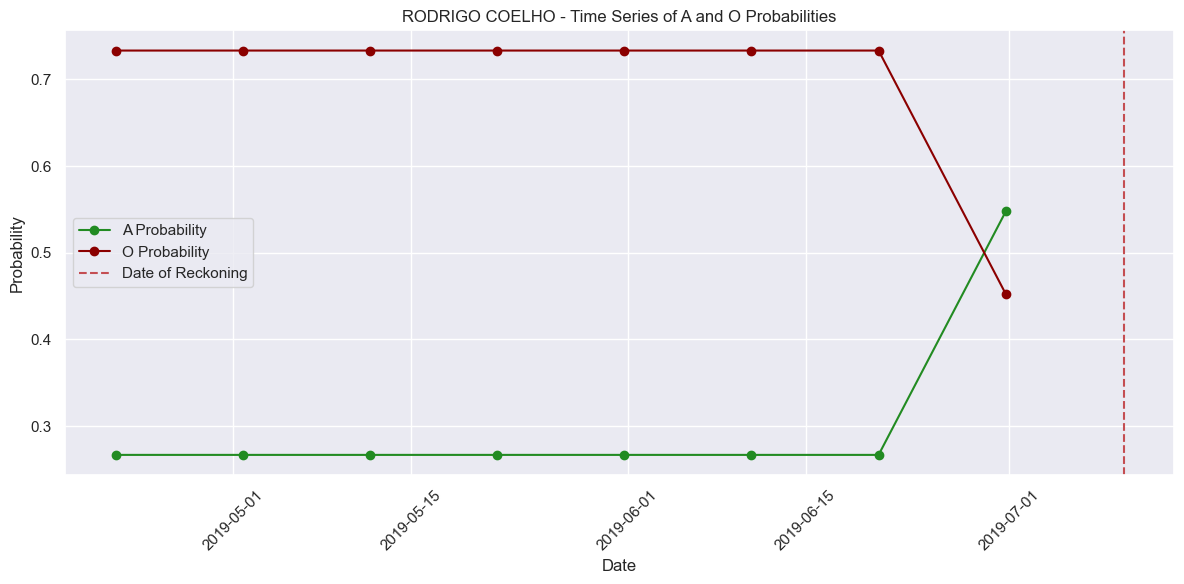

In [8]:

plot_prob_evolution(from_politician_to_prob_time_series[477], date_of_reckoning=date_of_reckoning, name = from_id_to_name_high_vol[428])

In [ ]:
# set_probability
bars = plt.bar(set_probability.keys(), set_probability.values(), width=0.5, color=['#77dd77', '#ff6961'])
plt.xlabel('Trajectory Type')
plt.ylabel('Probability')
plt.title('Probability of Politician Vote - ' + probability_analysis.get_politician_names()[267])

# Add labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [193]:
df = pd.read_csv("data/DATA_FINAL.csv")
df.time = pd.to_datetime(df.time)
df = df.sort_values(by=['time'])

In [194]:
tau = crop_statements_until_t_by_politician(df,'2019-07-11 15:30:16', 491)

In [ ]:
print(tau)

In [ ]:

data_path = "data/DATA_FINAL.csv"
data_deputados_path = "data/DEPUTADOS_FINAL.csv"

probability_analysis = ModelStats(data_path, data_deputados_path)

lambd = 0.6
delta = 0.3
lag = 10


In [ ]:
probability_analysis  = probability_analysis.get_votes(lambd, delta, lag, datetime(2020,1,1))

In [ ]:
from datetime import datetime
from dataclasses import dataclass
from typing import List

@dataclass
class PoliticianOpinion:
    politician_name: str
    opinion_score: float

@dataclass
class PoliticiansOpinionInTime:
    politician_opinions: List[PoliticianOpinion]
    datetime: datetime

def get_politician_trajectories(opinions_in_time: List[PoliticiansOpinionInTime], politician_name: str):
    """
    Get all different trajectories of opinions for a single politician.

    Parameters:
    - opinions_in_time: List of PoliticiansOpinionInTime instances.
    - politician_name: The name of the politician.

    Returns:
    - A list of trajectories for the specified politician.
    """
    politician_trajectories = []

    # Iterate through the list of opinions_in_time
    for opinion_in_time in opinions_in_time:
        datetime_point = opinion_in_time.datetime
        # Find the politician's opinion at this datetime_point
        politician_opinion = next((opinion.opinion_score for opinion in opinion_in_time.politician_opinions
                                   if opinion.politician_name == politician_name), None)

        if politician_opinion is not None:
            # Append the datetime_point and opinion to the trajectories
            politician_trajectories.append((datetime_point, politician_opinion))

    return politician_trajectories

# Example usage:
opinions_data = [
    PoliticiansOpinionInTime([PoliticianOpinion("Politician1", 0.8), PoliticianOpinion("Politician2", 0.5)], datetime(2023, 1, 1)),
    PoliticiansOpinionInTime([PoliticianOpinion("Politician1", 0.7), PoliticianOpinion("Politician2", 0.6)], datetime(2023, 1, 2)),
    PoliticiansOpinionInTime([PoliticianOpinion("Politician1", 0.6), PoliticianOpinion("Politician2", 0.7)], datetime(2023, 1, 3)),
]

politician_name_to_check = "Politician1"
trajectories = get_politician_trajectories(opinions_data, politician_name_to_check)

print(f"Opinion trajectories for {politician_name_to_check}: {trajectories}")


In [ ]:
@dataclass
class OpinionHistogram:
    """Class for identifying a single politician opinion"""
    bins: list[int]
    opinion: list[int] 

@dataclass
class ScoreHistogram:
    """Class for identifying a single politician opinion"""
    politician_id: list[int]
    opinion: list[int]